CSc I6716 Fall 2020 -Assignment 1
Computer Science – The City College of New York
Computer Vision
Assignment 1 ( Deadline: 10/04 Sunday) before midnight)
===============================================================
Note: All the writings of your assignment must be in “soft” copies (in a single PDF file)  by sending it to Prof. Zhu <cv.zhu.ccny@gmail.com> via an email attachment. You are responsible for the lose of your submissions if you don’t include  “CSC I6716 Fall 2020 – Assignment 1 ” in the subject of your email. For your programming part, in addition to the writing report, please also send your source code in a separate file – in their original formats; please don’t format them into PDF or Word formats. Please don’t send in your images and executable.  You may want to include images, tables, etc in your report if they show results of your work. Please write your names and IDs (last four digits) in both files – for your report and the code, and use a meaningful and unique file name for your submission. Please also write your name either in the Sending Line or the email body.

1. Writing Assignments (10×4 = 40 points)
  (1). How does an image change (e.g., objects’ sizes in the image, field of view, etc.) when you change the zoom factors of your pinhole camera (i.e., the focal length of a pinhole camera is changed)?
(2). Give an intuitive explanation why a pinhole camera has an infinite depth of field, i.e., the images of objects are always sharp regardless their distances from the camera.
(3). In the thin lens model, 1/o + 1/i = 1/f, there are three variables, the focal length f, the object distance o and the image distance i (please refer to the Slides of the Image Formation lecture). If we define Z = o-f, and z = i-f, please write a few words to describe the physical meanings of Z and z, and then prove that Z*z = f*f given 1/o + 1/i = 1/f.
(4). Prove that, in the pinhole camera model, three collinear points in the world (i.e., they lie on a line  in 3D space) are imaged into three collinear points on the image plane. You may either use geometric reasoning (with line drawings) or algebra deduction (using equations).

2. Programming  Assignments (Matlab preferred – here is a quick matlab tutorial.  You may use C++, Java or Python if you like, but you may need to show the running of your program during my office hours when I ask you. If you don’t have a Matlab license, CUNY faculty and students will be able to download a standalone Matlab version by creating an account using your CCNY email account at this website. ) (15×4 = 60 points)

Image formation.  In this small project, you are going to read, manipulate and write image data. The purpose of the project is to make you familiar with the basic digital image formations. Your program should do the following things:

Read in a color image C1(x,y) = (R(x,y), G(x,y), B(x,y)) in Windows BMP format, and display it.
Display the images of the three color components, R(x,y), G(x,y) and B(x,y), separately. You should display three black-white-like images.
Generate an intensity image I(x,y) and display it. You should use the equation I = 0.299R + 0.587G + 0.114B (the NTSC standard for luminance) and tell us what are the differences between the intensity image thus generated from the one generated using a simple average of the R, G and B components. Please use an algorithm to show the differences instead by just observing the images by your eyes.
The original intensity image should have 256 gray levels.  Please uniformly quantize this image into K levels ( with K=4, 16, 32, 64).  As an example,  when K=2,  pixels whose values are below 128 are turned to 0,  otherwise to 255.  Display the four quantized images with four different K levels,  and tell us how the images still look like or different from the original ones, and where you cannot see any differences.
Quantize  the original three-band color image C1(x,y) into K level color images CK(x,y)= (R'(x,y), G'(x,y), B'(x,y)) (with uniform intervals) , and display them. You may choose K=2 and 4 (for each band).  Do they have any advantages in viewing and/or in computer processing (e.g. transmission or segmentation)?
Quantize  the original three-band color image C1(x,y) into a color image CL(x,y)= (R'(x,y), G'(x,y), B'(x,y)) (with a logarithmic function) , and display it. You may choose  a function  I’ =C ln (I+1) ( for each band), where I is the original value (0~255) , I’ is the quantized value,  and C is a constant to scale I’  into (0~255), and ln is the natural logarithmic function.  Please describe how you find the best C value so for an input in the range of 0-255, the output range is still 0 – 255. Note that when I = 0, I’ = 0 too.
Please for each of the above (1-6), provide your analysis / observations / conclusions, rather than just show the experimental results in images and/or charts. I have provided a piece of starting code for you to use. Questions 1 and 2 have been done in the Matlab code.  You only need to work on 3 to 6 (15×4 = 60 points). You may use Prof. Zhu’s old ID picture  as well as other pictures for testing your algorithms.

## ---------------- Step 1 ------------------------
### Read in an image, get information
### type help imread for more information

In [1]:
InputImage = 'IDPicture.png'
#OutputImage1 = 'IDPicture_bw.bmp'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
C1 = plt.imread(InputImage)
C1.shape


(250, 250, 4)

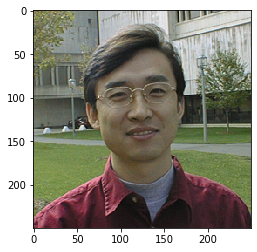

In [4]:
ROWS, COLS, CHANNELS = C1.shape
plt.imshow(C1)

# ---------------- Step 2 ------------------------
If you want to display the three separate bands with the color image in one window, here is what you need to do:
Basically you generate three "color" images using the three bands respectively and then use [] operator to concatenate the four images the orignal color, R band, G band and B band

In [10]:
np.uint64(C1)

array([[[0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        ...,
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1]],

       [[0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        ...,
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1]],

       [[0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        ...,
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1]],

       ...,

       [[0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        ...,
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1]],

       [[0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        ...,
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1]],

       [[0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        ...,
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1]]], dtype=uint64)

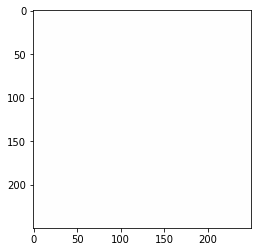

In [32]:
#% First, generate a blank image. Using "uinit8" will 
#% give you an image of 8 bits for each pixel in each channel
#% Since the Matlab will generate everything as double by default
plt.imshow(np.uint8(C1))

In [36]:
np.zeros?

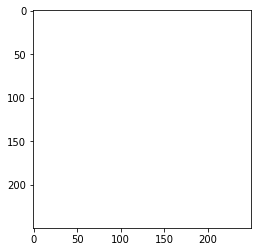

In [39]:
CR1=np.zeros((ROWS, COLS, CHANNELS))
plt.imshow(np.uint8(CR1))

In [47]:
'''
% Note how to put the Red band of the color image C1 into 
% each band of the three-band grayscale image CR1
% Do the same thing for G
% and for B
'''

C = [ C1[:,:,i] for i in range(3) ]
print(len(C))
print(len(C[0]))
print(len(C[0][0]))

R,G,B = C[0], C[1], C[2]

3
250
250


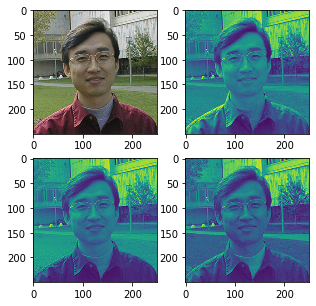

In [62]:
disimg = [[C1, R],[G,B]]
fig, axs = plt.subplots(2,2, figsize=(5,5))
for i in range(2):
    for j in range(2):
        axs[i,j].imshow(disimg[i][j])

plt.show()

## Why does the Red look like the green? The Blue channel is certainly different. It looks darker. Let's check R and G are different!

In [61]:
R==G

array([[False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

### It turns out that plt.imshow has default color scale. The array of images shows the relative color intensity otherwise all the colors mixed together.

% ---------------- Step 3 ------------------------
% Now we can calculate its intensity image from 
% the color image. Don't forget to use "uint8" to 
% covert the double results to unsigned 8-bit integers

I1    = uint8(round(sum(C1,3)/3));

% You can definitely display the black-white (grayscale)
% image directly without turn it into a three-band thing,
% which is a waste of memeory space

No2 = figure;  % Figure No. 2
image(I1);

% If you just stop your program here, you will see a 
% false color image since the system need a colormap to 
% display a 8-bit image  correctly. 
% The above display uses a default color map
% which is not correct. It is beautiful, though